# NFL Recieving Stats 2020

In [194]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import scipy.stats
import numpy as np

## Web Scraping

The data choosen is last year's NFL recieving stats for all players who caught passes. This data was collected over the 16 game season however, some players missed games due to injury or personal matters.

First we will look at how the recieving stats vary by position, considering there are four different types of players that catch passes.

Then the analysis will focus on the relationship of yards compared to the touchdowns being scored by player.

Finally we will look at the team's reception yards to get a better picture of who was performing the best last year.

In [2]:
recieving = pd.read_csv("Football_Recieving_Stats_2020.csv")  # Dataset
recieving

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb
0,1,Stefon Diggs*+\DiggSt00,BUF,27,WR,16,15,166,127,0.765,1535,12.1,8,73,55,9.2,7.9,95.9,0
1,2,Davante Adams*+\AdamDa01,GNB,28,WR,14,14,149,115,0.772,1374,11.9,18,73,56,9.2,8.2,98.1,1
2,3,DeAndre Hopkins*\HopkDe00,ARI,28,WR,16,16,160,115,0.719,1407,12.2,6,75,60,8.8,7.2,87.9,3
3,4,Darren Waller*\WallDa01,LVR,28,TE,16,15,145,107,0.738,1196,11.2,9,69,38,8.2,6.7,74.8,2
4,5,Travis Kelce*+\KelcTr00,KAN,31,TE,15,15,145,105,0.724,1416,13.5,11,79,45,9.8,7.0,94.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Trevon Wesco\WescTr00,NYJ,25,NaN,12,4,2,1,0.500,5,5.0,0,0,5,2.5,0.1,0.4,0
495,496,Dede Westbrook\WestDe00,JAX,27,NaN,2,0,1,1,1.000,4,4.0,0,0,4,4.0,0.5,2.0,1
496,497,Antonio Williams\WillAn03,BUF,23,NaN,1,0,1,1,1.000,20,20.0,0,1,20,20.0,1.0,20.0,0
497,498,Luke Willson\WillLu00,2TM,30,NaN,8,0,3,1,0.333,12,12.0,0,0,12,4.0,0.1,1.5,0


## Positions Pie Chart

First, the data must be cleaned to sum the receptions for each position. We also got rid of the Quarterback and Right tackle positions because they had too few receptions to provide accurate statistics. These two also only catch passes on trick plays.

In [72]:
newrecieving = recieving.groupby("Pos")
sums = pd.DataFrame(newrecieving['Rec'].sum())
posi = ['Full-Back', 'Quarter-Back','Running-Back', 'Right-Tackle', 'Tight-End', 'Wide-Reciever']
sums.columns =['Rec']
sums['pos'] = posi
sums = sums.drop('RT')
sums = sums.drop('QB')
sums



,Rec,pos
Pos,,
FB,69,Full-Back
RB,2395,Running-Back
TE,2097,Tight-End
WR,6436,Wide-Reciever


Text(0.5, 0.98, 'Receptions by Position')

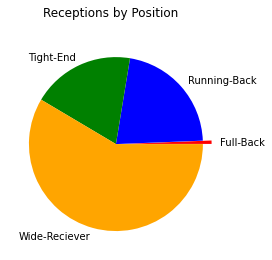

In [73]:
colors = ["red", "blue", "green", "orange"]
explode = (.1, 0, 0, 0,)
plt.pie(sums["Rec"], labels = sums["pos"], colors = colors, explode = explode)
plt.suptitle("Receptions by Position")

This pie chart shows that of course wide recievers are catching the most passes by a large margin. Intrestingly enough, tight ends and runningbacks have very similar receptions. Both of these positions have multiple jobs (Catching, blocking or running) so it makes sense that they combine for a little under half of the receptions. The fullback position is very under ultilized and many teams don't use one, therefore it has very few receptions.

## Seaborn Reg Plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


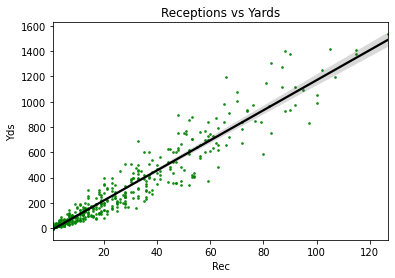

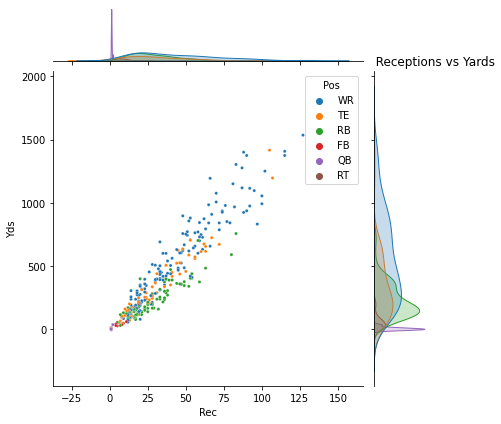

In [185]:
sns.regplot(x = "Rec", y ="Yds", data= recieving, color = "g", scatter_kws = {'s' : 3}, line_kws = {'color' : 'black'})
plt.title('Receptions vs Yards')
sns.jointplot(x = "Rec", y = "Yds", data = recieving,
              hue = "Pos", joint_kws = {'s' : 10})
plt.title('                  Receptions vs Yards')
plt.show()

These two plots show the relationship between receptions and yards acquired. Clearly there is a linear relationship. The second graph gives a better idea on how the positions perform differently. The frequency of receptions shown on the top shows that the number of receptions for position are pretty split, meaning the talent level is very spread out. The yards however show that the running back position and tight ends are limited to much less yards. Most players only accumulate around 300 yards on the season at these positions. The wide recievers are still quite spread out in terms of yards. Another intresting thing to note, most tight ends were limited in yards except for two players that are outliers. These two are Travis Kelce and Darren Waller, who run almost as many routes as wide recievers.

## Statistical Analysis

In [197]:
correlation_matrix = np.corrcoef(recieving["Rec"], recieving["Yds"])
r = correlation_matrix[0,1]
r_squared = r**2
print(r)
print(r_squared)

0.9569598476466483
0.9157721500078964


The R value is extremely high at 95.69 and the R squared is also high at 91.57. This means that there is almost a perfect one to one linear correlation between the amount of receptions effect on yards gained. The high r squared value also means 91.6% of the variance in our data can be explained

In conclusion, the amount of yards to be gained by a reciever is strongly related to how many catches he gets on the year.

## Does a reciever who gains more yards on each catch have a better chance of scoring a touchdown?

Yards per Reception gives a better idea what kind of reciever players are. Some recievers are fast and tend to run deeper routes. These deep threats often score when they outspeed their defender.

Text(0, 0.5, 'Yards per Reception')

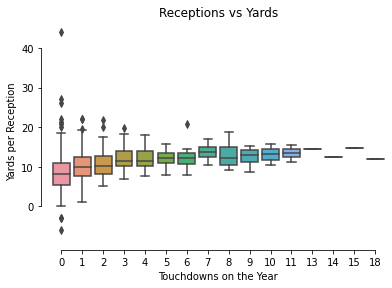

In [182]:
sns.boxplot(x = "TD", y = "Y/R", data = recieving)
sns.despine(offset = 10, trim = True)
plt.title('Receptions vs Yards')
plt.xlabel('Touchdowns on the Year')
plt.ylabel('Yards per Reception')

The amount of touchdowns scored compared to how many yards a player only has a slight linear trend. Players who didn't see the endzone often averaged much less yards per reception. However, as soon as players started to score around 7 touchdowns, the Y/R evened out. Some players to take note of is the second leader in touchdowns, Tyreek Hill, who is the fastest player in the league. The best reciever in the league, Davante Adams, scored the most TD's with less games played. He had an average Y/R though, but led the league in yards per game.

Keep in mind, for runningbacks this only includes their touchdown receptions therefore most RB's didn't have many. To answer the question though, players who gain more yards per reception do indeed have a better chance to score.

## Team Recieving Yards

To see the reception yards per team the data once again had to be cleaned. Unfortunately, players who were traded do not have seperate stats for each team so they had to be removed. This was very rare and didn't include any of the top 150 players so it didn't affect the data much.

In [175]:
teamrecieving = recieving.groupby("Tm")
teamsums = pd.DataFrame(teamrecieving['Yds'].sum())
teamsums.columns =['Yards']
teamsums = teamsums.drop('2TM')
teamsums = teamsums.reset_index()
teamsums['tcolor'] = ['red', 'darkred', 'purple', 'blue', 'lightblue', 'darkorange', 'sandybrown', 'orange', 'grey', 'orange',
          'lightblue', 'green', 'maroon', 'darkblue', 'teal', 'orangered', 'yellow', 'blue', 'black', 'cyan','purple',
          'gold', 'darkblue', 'blue', 'darkgreen', 'green', 'yellow', 'lightgreen', 'gold', 'red', 'lightblue', 'maroon']
teamsums


,Tm,Yards,tcolor
0,ARI,4099,red
1,ATL,4620,darkred
2,BAL,2907,purple
3,BUF,4786,blue
4,CAR,4129,lightblue
5,CHI,3925,darkorange
6,CIN,3793,sandybrown
7,CLE,3687,orange
8,DAL,4511,grey
9,DEN,3673,orange


<BarContainer object of 32 artists>

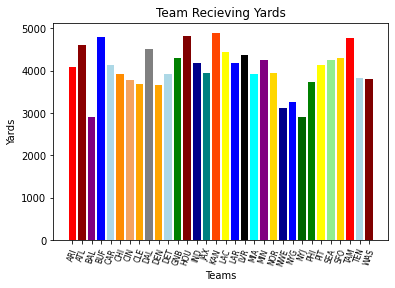

In [184]:
_ = plt.bar(x = "Tm", height="Yards", data=teamsums, color = 'tcolor')
plt.xticks(rotation=70, fontsize=7.5)
plt.title('Team Recieving Yards')
plt.xlabel('Teams')
plt.ylabel('Yards')
_

As expected, the teams with the most recieving yards had some of the best recievers. However, quarterback play seems to be the largest factor in the yards. The teams with the most yards, the Chiefs and Bucs, happened to have the best quarterbacks: Patrick Mahomes and Tom Brady. The third best team had the best reciever on the year, Stefon Diggs. At the very bottom of the list was the Ravens, whose quarterback, Lamar Jackson, has been criticsed for never throwing the ball and preferring to run it himself.